In [1]:
#What category of problem is this?

#You're no novice to data science, but let's make sure we agree on the basics.

#As Peter from DrivenData explained in the video, you're going to be working with school district budget data. This data
#can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type:
#Librarian.

#Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled
#examples.

#What type of machine learning problem is this?

#Possible Answers

#Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.

#Unsupervised Learning, because the model doesn't output labels with certainty.

#Unsupervised Learning, because not all data is correctly classified to begin with.

#Supervised Learning, because the model will be trained using labeled examples.*

In [2]:
#NOTE: Using correctly labeled budget line items to train means this is a supervised learning problem.

In [3]:
#What is the goal of the algorithm?

#As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you
#will tell us what type of supervised machine learning problem this is, and why you think so.

#Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of
#each possible label, taking most probable label as the correct label.

#Possible Answers

#Regression, because the model will output probabilities.

#Classification, because predicted probabilities will be used to select a label class.*

#Regression, because probabilities take a continuous value between 0 and 1.

#Classification, because the model will output probabilities.

In [4]:
#NOTE: Specifically, we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), because there
#are 9 broad categories that each take on many possible sub-label instances.

In [5]:
#Loading the data

#Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a
#DataFrame and then do some Exploratory Data Analysis (EDA) of it.

#The training data is available as TrainingData.csv. Your first task is to load it into a DataFrame in the IPython Shell
#using pd.read_csv() along with the keyword argument index_col=0.

#Use methods such as .info(), .head(), and .tail() to explore the budget data and the properties of the features and
#labels.

#Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description
#column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

#Some columns correspond to the budget item labels you will be trying to predict with your model. For example, the
#Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

#Use df.info() in the IPython Shell to answer the following questions:

#- How many rows are there in the training data?
#- How many columns are there in the training data?
#- How many non-null entries are in the Job_Title_Description column?

import pandas as pd
df = pd.read_csv('datasets/TrainingData.csv', sep=';')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Function                1560 non-null   object 
 1   Use                     1560 non-null   object 
 2   Sharing                 1560 non-null   object 
 3   Reporting               1560 non-null   object 
 4   Student_Type            1560 non-null   object 
 5   Position_Type           1560 non-null   object 
 6   Object_Type             1560 non-null   object 
 7   Pre_K                   1560 non-null   object 
 8   Operating_Status        1560 non-null   object 
 9   Object_Description      1461 non-null   object 
 10  Text_2                  382 non-null    object 
 11  SubFund_Description     1183 non-null   object 
 12  Job_Title_Description   1131 non-null   object 
 13  Text_3                  296 non-null    object 
 14  Text_4                  193 non-null    

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86000,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
1,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29000,PUPIL TRANSPORTATION,General Fund,NaN
2,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82000,Instruction - Regular,General Purpose School,NaN
3,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02000,"Title I, Part A Schoolwide Activities Related ...",General Operating Fund,NaN
4,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43000,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,27.04000,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION
1556,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,EMPLOYEE BENEFITS,...,NaN,PERSONNEL-PAID LEAVE,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,NaN,STAFF SERVICES,NaN,CENTRAL
1557,Substitute Compensation,Instruction,School Reported,School,Special Education,Substitute,Substitute Compensation,NO_LABEL,PreK-12 Operating,OTHER PERSONAL SERVICES,...,NaN,School,0.0,EXCEPTIONAL,NaN,NaN,200.39000,NaN,GENERAL FUND,NaN
1558,Facilities & Maintenance,O&M,Leadership & Management,Non-School,Gifted,Custodian,Other Compensation/Stipend,Non PreK,PreK-12 Operating,Extra Duty Pay/Overtime For Support Personnel,...,Extra Duty Pay/Overtime For Support Personnel,Unallocated,NaN,Facilities Maintenance And Operations,Gifted And Talented,ANY CUS WHO IS NOT A SUPER,5.29000,Gifted And Talented,General Operating Fund,ADDL REGULAR PAY-NOT SMOOTHED


In [6]:
#Possible Answers

#25 rows, 1560 columns, 1560 non-null entries in Job_Title_Description.

#25 rows, 1560 columns, 1131 non-null entries in Job_Title_Description.

#1560 rows, 25 columns, 1131 non-null entries in Job_Title_Description.*

#1560 rows, 25 columns, 1560 non-null entries in Job_Title_Description

In [7]:
#NOTE: Looks like there are a lot of missing values. You will need to keep your eyes on those.

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


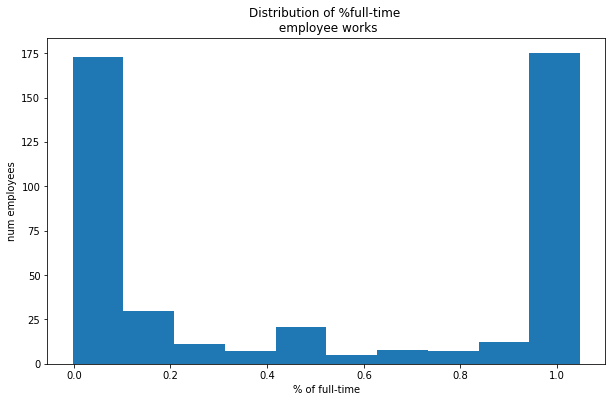

In [8]:
#Summarizing the data

#You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data
#has been pre-loaded into a DataFrame called df.

#You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64.
#You'll notice that there are two numeric columns, called FTE and Total.

#- FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the
#percentage of full-time that the employee works. A value of 1 means the associated employee works for the school
#full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
#- Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

#After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see
#the distribution of part-time and full-time employees in the dataset.

#This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the
#Scikit-Learn Cheat Sheet and keep it handy!

# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [9]:
#NOTE: The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the
#FTE column is bimodal. That is, there are some part-time and some full-time employees.

In [10]:
#Exploring datatypes in pandas

#It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be
#involved. Towards that end, let's explore what we have.

#The data has been loaded into the workspace as df. Your job is to look at the DataFrame attribute .dtypes in the IPython
#Shell, and call its .value_counts() method in order to answer the question below.

#Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell.
#df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

#How many columns with dtype object are in the data?

df.dtypes.value_counts()

object     23
float64     2
dtype: int64

In [11]:
#Possible Answers

#2.

#23.*

#64.

#25.

In [12]:
#NOTE: That's a lot of (slow) object types. Let's do some type conversion!

In [13]:
#Encode the labels as categorical variables

LABELS = ['Function','Use','Sharing','Reporting','Student_Type','Position_Type','Object_Type','Pre_K','Operating_Status']

#Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You
#just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to
#predict? Let's find out!

#There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can
#take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using
#df[LABELS].dtypes.

#You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your
#task is to convert the labels to category types using the .astype() method.

#Note: .astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the
#.apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


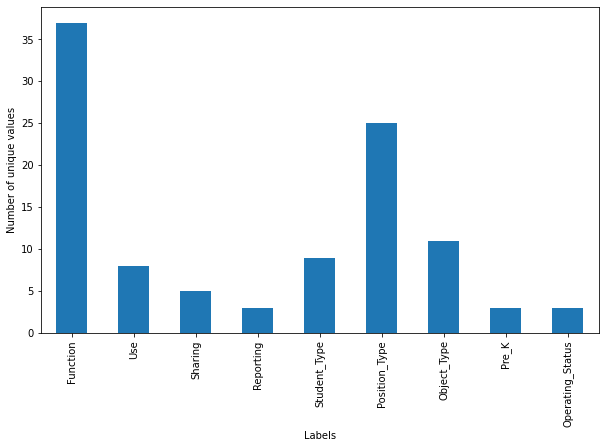

In [14]:
#Counting unique labels

#As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by
#counting and plotting the number of unique values for each category of label.

#The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to
#category types.

#pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in
#a Series.

# Import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

In [15]:
#NOTE: That's a lot of labels to work with. How will you measure success with these many labels?

In [16]:
#Penalizing highly confident wrong answers

#As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident,
#i.e., a high probability is assigned to the incorrect class.

#Suppose you have the following 3 examples:

$$
A:y=1,p=0.85
\\
B:y=0,p=0.99
\\
C:y=0,p=0.51
$$

In [17]:
#Select the ordering of the examples which corresponds to the lowest to highest log loss scores. y is an indicator of
#whether the example was classified correctly. You shouldn't need to crunch any numbers

#Possible Answers

#Lowest: A, Middle: B, Highest: C.

#Lowest: C, Middle: A, Highest: B.

#Lowest: A, Middle: C, Highest: B.*

#Lowest: B, Middle: A, Highest: C.

In [18]:
#NOTE: Of the two incorrect predictions, B will have a higher log loss because it is confident and wrong.

In [19]:
#Computing log loss with NumPy

import numpy as np
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

#To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data
#generated with NumPy and compute the log loss using the provided function compute_log_loss(), which Peter showed you in
#the video.

#5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels,
#correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

#Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values,
#actual_values). It takes the predicted values as the first argument and the actual values as the second argument.

# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss))

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss))

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss))

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss))

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss))

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


In [20]:
#NOTE: Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use
#on your models.